In [1]:
import sys
sys.path.append('../src')
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from Params import *
from NeutrinoFuncs import *
from PlotFuncs import *
from Like import *
import cmasher as cmr
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm, PowerNorm, BoundaryNorm
from matplotlib import cm

#interval = linspace(0.12,0.9)
#colors = cmr.pride(interval)

interval = linspace(0.0,0.9)
colors = cm.Blues(interval)
#colors = cm.Purples(interval)
#print(colors)

cmap = LinearSegmentedColormap.from_list('name', colors)
#print(cmap(0))
#print(cmap(2))

#data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_detailed_SI_3sigma.txt')
data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_detailed_SI_3sigma_updatedparams_fine.txt')
#data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_detailed_SI_3sigma_updatedparams.txt')
Ex = flipud(data[1:,1:])
m,sig,NUFLOOR,DY = Floor_2D(data,Ex_crit=1e19,slope_idx=1.0)

In [2]:
# make a copy of the contour, cutting off at certain derivative value
cut_n = 2.5 #2.37
DY_cut = copy(DY)
for j in range(0,len(m)):
    for i in reversed(range(0,len(sig))):
        #print(sig[i])
        if DY_cut[i,j] >= cut_n:
            DY_cut[:i+1,j] = cut_n
            break

print(DY_cut[DY_cut>cut_n])

[]


<ipython-input-4-02b1073f6b13>:12: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
<ipython-input-4-02b1073f6b13>:146: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax1.pcolormesh(-m,sig,DY,vmin=vmin,vmax=vmax,cmap=cmap,rasterized=True)


[ 1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.    4.25
  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75  7.    7.25
  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25
 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25 12.5  12.75 13.   13.25
 13.5  13.75 14.   14.25 14.5  14.75 15.  ]
[1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.  ]
(0.03137254901960784, 0.2897347174163783, 0.570319108035371, 1.0)


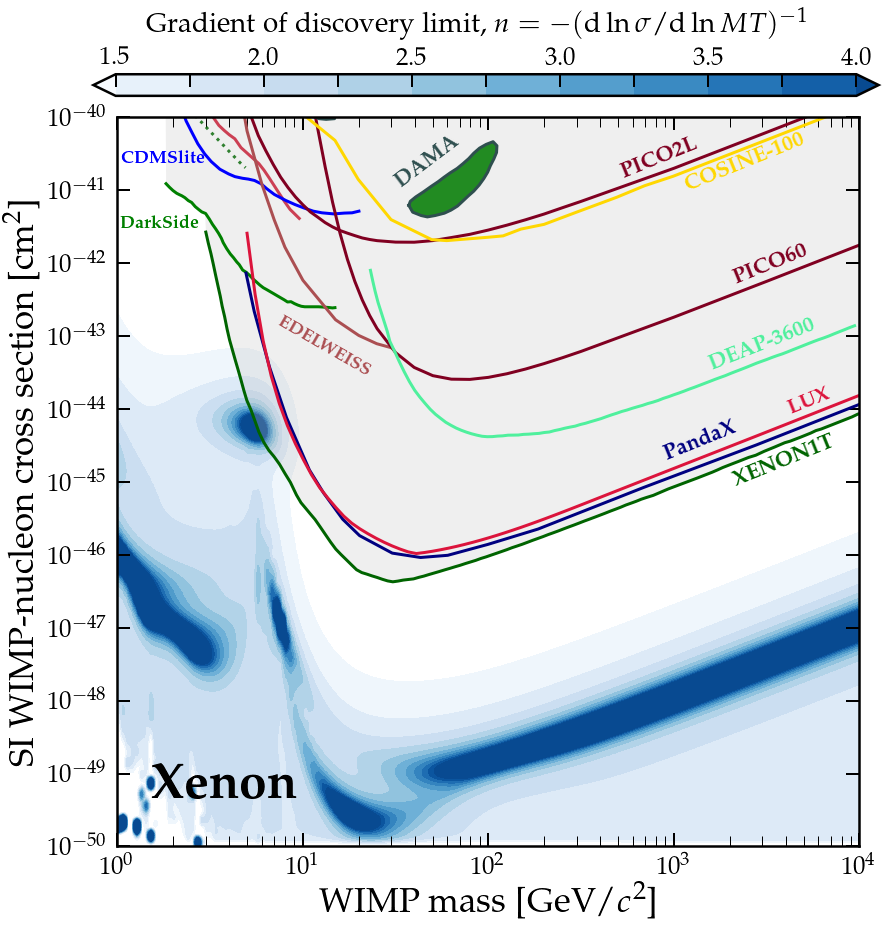

In [4]:
# single panel version
pek = line_background(10,'k')

# Figure setup
import matplotlib.gridspec as gridspec
lw = 2.5
lfs = 35
tfs = 25
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
fig = plt.figure(figsize=(13.3,15))
ax1 = fig.gca()

#xmin = 1e-1
xmin = 1e0
xmax = 1e4
ymin = 1e-50
ymax = 1e-40


# Plot limits
limit_labels = True
AllLimits = loadtxt("../data/WIMPLimits/SI/AllLimits-2021.txt")
plt.fill_between(AllLimits[:,0], AllLimits[:,1],y2=ymax,
                 edgecolor=None,
                 facecolor=col_alpha('gray',0.5),
                 alpha=0.25,
                 zorder=0)
SILimits(ax1,Annotations=False,Fills=False,facecolor=[0.0, 0.62, 0.38],edgecolor='darkgreen',alph=1)

rot = 22
# Limits labels
if limit_labels:
    ax1.text(1.05,2.4e-41,r"{\bf CDMSlite}",color="blue",fontsize=18,rotation=0)
    ax1.text(2.75,3e-42,r"{\bf DarkSide}",color="green",fontsize=18,rotation=0,ha='right')
    ax1.text(850.0,2.e-45,r"{\bf PandaX}",color="navy",fontsize=22,rotation=rot)
    ax1.text(2000.0,0.9e-45,r"{\bf XENON1T}",color="darkgreen",fontsize=22,rotation=rot)
    ax1.text(7.0,2.9e-44,r"{\bf EDELWEISS}",color=[0.67, 0.31, 0.32],fontsize=18,rotation=-30)
    ax1.text(2000.0,5.4e-43,r"{\bf PICO60}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=rot)
    ax1.text(500.0,1.5e-41,r"{\bf PICO2L}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=rot)
    ax1.text(30.0,1.1e-41,r"{\bf DAMA}",color='darkslategray',fontsize=22,rotation=37)
    ax1.text(1100.0,1e-41,r"{\bf COSINE-100}",color="gold",fontsize=22,rotation=rot)
    ax1.text(1.5e3,3.5e-44,r'{\bf DEAP-3600}',color='#4ff09d',fontsize=22,rotation=rot-0.5)
    ax1.text(4000.0,8.7e-45,r"{\bf LUX}",color="crimson",fontsize=21,rotation=rot)
    #CurvedArrow(2.6e3,3.8e3,0.6e-44,0.45e-44,alpha=1,color='navy',connectionstyle="arc3,rad=-0.3",\
    #            style = "Simple, tail_width=2, head_width=6, head_length=8")

# ----------------------------------------------------------
# draw the contour of disco sens scaling here

vmin = 1.50
#vmax = cut_n
vmax = 4

n_div = 0.25
lvl_min = vmin
lvl_max = 15
n_lvl = int((lvl_max-lvl_min)/n_div)+1
levels = linspace(lvl_min,lvl_max,n_lvl)

n_tick = int((vmax-vmin)/n_div)+1
ticks = linspace(vmin,vmax,n_tick)
print(levels)
print(ticks)

#col_min = cmap(0.0)
col_min = cmap(vmin)
print(col_min)
#cnt = ax1.contourf(m,sig,DY,levels=linspace(2,15,100),vmin=2.3,vmax=vmax,cmap=cmap,zorder=-100)
#cnt = ax1.contourf(m,sig,DY,levels=linspace(0,15,31),vmin=vmin,vmax=vmax,cmap=cmap,zorder=-100)
#cnt = ax1.contourf(m,sig,DY,levels=linspace(2,15,53),vmin=vmin,vmax=vmax,cmap=cmap,zorder=-100)

#cnt = ax1.contourf(m,sig,DY,levels=linspace(0,15,100),norm=PowerNorm(1./2., vmin=vmin,vmax=vmax),cmap=cmap,zorder=-100)
#cnt = ax1.contourf(m,sig,DY,levels=linspace(2,15,100),norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmap,zorder=-100)

cnt = ax1.contourf(m,sig,DY,levels=levels,vmin=vmin,vmax=vmax,cmap=cmap,zorder=-100)
#cnt.cmap.set_over('red')
#cnt.cmap.set_under('blue')
#cnt.cmap.set_over(colors[-1])
#cnt.cmap.set_under(colors[0])
#cnt.changed()
for c in cnt.collections: c.set_edgecolor("face")

#cnt2 = ax1.contour(m,sig,DY,levels=levels,vmin=vmin,vmax=vmax,cmap=cmap,zorder=-100)
#ax1.clabel(cnt2, inline=1, fontsize=14)

#ax1.plot(m,NUFLOOR,'-',color='gray',lw=3,path_effects=pek,zorder=1) # floor is here
#ax1.plot(m,NUFLOOR,'-',color='gray',lw=0.5,zorder=1) # floor is here

# fill out lower part with bottom of color map:
#ax1.fill_between(m,NUFLOOR,y2=1e-99,color=col_min,zorder=-1000)


# One neutrino lime
#onenu = NuFloor_1event(m,Xe131,nths=100)
#n_nu_evts = 1
#nuline = NuFloor_Nevent(m,Xe131,n_nu_evts=n_nu_evts,nths=100)
#plt.plot(m,nuline,'k:',lw=3,label=r'$1\nu$',alpha=0.7)
#ax1.text(1e3,1.5e-47,r'{:d} $\nu$ event'.format(n_nu_evts),color='k',alpha=0.85,fontsize=22,rotation=25)

#n_nu_evts = 5
#nuline = NuFloor_Nevent(m,Xe131,n_nu_evts=n_nu_evts,nths=100)
#plt.plot(m,nuline,'k:',lw=3,label=r'$5\nu$',alpha=0.7)
#ax1.text(1e3,4.5e-48,r'{:d} $\nu$ events'.format(n_nu_evts),color='k',alpha=0.85,fontsize=22,rotation=25)

# Axis limits

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])

# Text labels
ax1.set_xlabel(r"WIMP mass [GeV$/c^2$]",fontsize=lfs)
ax1.set_ylabel(r"SI WIMP-nucleon cross section [cm$^2$]",fontsize=lfs)

#plt.gcf().text(0.16*(1-0.01),0.17*(1+0.01),r'{\bf Xenon}',color='k',fontsize=50,alpha=0.2)
plt.gcf().text(0.16,0.17,r'{\bf Xenon}',color='k',fontsize=50)


# Neutrino labels
nu_labels = False
lc = 'k'
txtalph = 0.95
if nu_labels:
    ax1.text(1e3,5e-49,'Atmospheric',color=lc,alpha=txtalph,fontsize=22,rotation=25)
    ax1.text(30,2e-50,'DSNB',color=lc,alpha=txtalph,fontsize=22,rotation=0)
    ax1.text(4.5,4e-48,r'$hep$',color=lc,alpha=txtalph,fontsize=22,rotation=0)
    ax1.text(3.5,4.5e-46,r'$^8$B',color=lc,alpha=txtalph,fontsize=22,rotation=0)
    ax1.text(0.8,5e-48,r'Reactor',color=lc,alpha=txtalph,fontsize=18,rotation=0)
    ax1.text(0.6,2e-47,r'Geo',color=lc,alpha=txtalph,fontsize=20,rotation=0)
    ax1.text(0.45,7e-46,r'CNO',color=lc,alpha=txtalph,fontsize=20,rotation=0)
    ax1.text(0.39,6e-45,r'$pep$',color=lc,alpha=txtalph,fontsize=20,rotation=0)
    ax1.text(0.28,1.8e-44,r'$^7$Be',color=lc,alpha=txtalph,fontsize=20,rotation=0)
    ax1.text(0.15,3e-45,r'$^7$Be',color=lc,alpha=txtalph,fontsize=20,rotation=0)
    ax1.text(0.11,1.5e-46,r'$pp$',color=lc,alpha=txtalph,fontsize=20,rotation=0)

# Ticks
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.set_yticks(10.0**arange(-50,-39,1))

# Colorbar
im = ax1.pcolormesh(-m,sig,DY,vmin=vmin,vmax=vmax,cmap=cmap,rasterized=True)
#im = ax1.pcolormesh(-m,sig,DY,norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),cmap=cmap,rasterized=True)

fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 0.82, 0.82, 0.02])
#fig.colorbar(im, cax=cbar_ax,orientation='horizontal',extend='both',extendfrac=0.03,boundar)

norm = BoundaryNorm(ticks, cmap.N, extend='both')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax,orientation='horizontal',extend='both',extendfrac=0.03)


cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_ticks(ticks)
#cbar.set_ticklabels([m0,m1,m2,m3,m4])
plt.gcf().text(0.5,0.88,r'Gradient of discovery limit, $n = -({\rm d}\ln\sigma/{\rm d}\ln MT)^{-1}$',fontsize=28,ha='center')
cbar_ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True)

# Save figure
#MySaveFig(fig,'single_panel_nufog_blues',pngsave=True)

In [4]:
print(shape(m))
print(shape(sig))
print(shape(DY))
print( DY[sig>1e-41,:] )

(200,)
(650,)
(650, 200)
[]


<ipython-input-32-ecafa8be1c1f>:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']


5.936727216069123
49.58962013837212
99.08136566858666
995.3962309984233


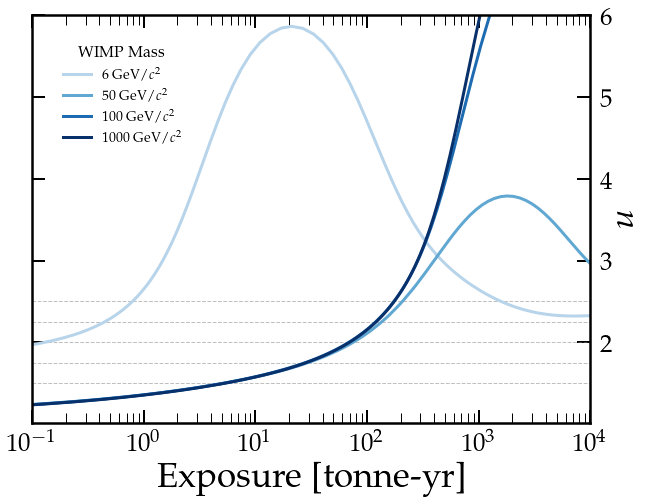

In [32]:
# Plot n as function of expo for representative mass values:

# Figure setup
import matplotlib.gridspec as gridspec
lw = 2.5
lfs = 35
tfs = 25
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
fig = plt.figure(figsize=(10,7.5))
ax3 = fig.gca()


for t in ticks:
    ax3.axhline(t,color='gray',linestyle='--',lw=1,alpha=0.5)

masses = [ 6, 50, 100, 1000]
start = 0.3
stop = 1.0
ncolor = len(masses)
cm_subsection = linspace(start, stop, ncolor) 
xe_colors = [ cm.Blues(x) for x in cm_subsection ]
ar_colors = [ cm.Oranges(x) for x in cm_subsection ]

colors = ['steelblue','']
y1 = 1e-41
y2 = 1e-50

for j,m_example in enumerate(masses):
    
    x1 = m_example
    x2 = m_example
    
    # Calculate derivative of discovery limit
    i = argmin(abs(m-m_example))
    print(m[i])
    E = Ex[:,i]
    y = gaussian_filter1d(gaussian_filter1d(log10(E),sigma=3),3)
    dy = -gradient(y,log10(sig[2])-log10(sig[1]))
    dy = gaussian_filter1d(dy,3) 
    
    ax3.semilogx(E,dy,lw=3,color=xe_colors[j],label=r'{:.0f} GeV$/c^2$'.format(m_example))

ax3.set_xscale('log')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax3.set_xlim([1e-1,1e4])
ax3.set_ylim([1.01,6.0])


ax3.set_ylabel(r'$n$',fontsize=lfs,rotation=-90,labelpad=30)
ax3.set_xlabel(r'Exposure [tonne-yr]',fontsize=lfs)

ax3.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax3.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)

leg1 = ax3.legend( loc='lower center',bbox_to_anchor=(0.16, 0.65),
                 fontsize=14,title=r'WIMP Mass',title_fontsize=16,
                 frameon=False,framealpha=0.3,edgecolor='white')


<ipython-input-12-4dd46f0a414c>:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']


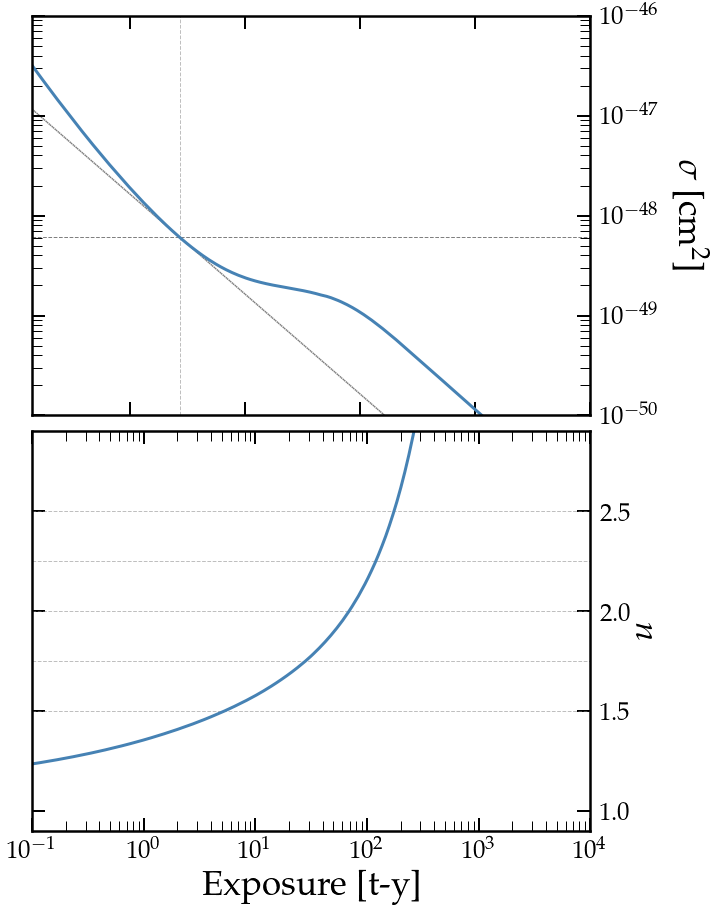

In [12]:
# Plot single mass example line

# Figure setup
import matplotlib.gridspec as gridspec
lw = 2.5
lfs = 35
tfs = 25
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
fig = plt.figure(figsize=(10,15))
gs = gridspec.GridSpec(2, 1)
gs.update(wspace=0.04)
gs.update(hspace=0.04)
ax2 = plt.subplot(gs[0,-1])
ax3 = plt.subplot(gs[1,-1])

m_example = 100.
x1 = m_example
x2 = m_example
y1 = 1e-44
y2 = 1e-50

# Calculate derivative of discovery limit
i = argmin(abs(m-m_example))
E = Ex[:,i]
y = gaussian_filter1d(gaussian_filter1d(log10(E),sigma=3),3)
dy = -gradient(y,log10(sig[2])-log10(sig[1]))
dy = gaussian_filter1d(dy,3) 

# Poisson line
sigfloor = sig[dy>2][-1]
E1 = interp(sigfloor,sig,E)
sig_poiss = sigfloor*sqrt(E1)/sqrt(E)
ax2.plot(E,sig_poiss,'k:',zorder=1,alpha=0.5)
#ax2.text(6e3,0.45e-47,r'$\sigma \propto N^{-1/2}$',color='k',alpha=0.5,rotation=-46)

# Plot horizontal/vertical lines
Efloor = E[dy>2][-1]
#ax2.axhline(sigfloor,color='gray',lw=3,path_effects=pek)
#ax2.axvline(Efloor,lw=3,color='k',linestyle='--',alpha=0.5)
#ax3.axvline(Efloor,lw=3,color='gray',path_effects=pek)
#ax3.axhline(2,color='k',linestyle='--',lw=3,alpha=0.5)

ax2.axhline(sigfloor,color='gray',lw=1,linestyle='--')
ax2.axvline(Efloor,lw=1,color='gray',linestyle='--',alpha=0.5)
#ax3.axhline(2,color='gray',linestyle='--',lw=1,alpha=0.5)
#ax3.axhline(1,color='gray',linestyle='--',lw=1,alpha=0.5)

for t in ticks:
    ax3.axhline(t,color='gray',linestyle='--',lw=1,alpha=0.5)

#ax2.text(1e6,sigfloor*1.5,r'{\bf Neutrino ``floor"}',color='k',ha='center')
#ax2.text(1e6,sigfloor/2.5,r'{\bf Neutrino fog}',color='k',alpha=0.5,ha='center')

ax2.loglog(E,sig,lw=3,color='steelblue')
ax3.semilogx(E,dy,lw=3,color='steelblue')

# Plot coloured lines
#ax2.loglog(E,sig,lw=3,color='w',path_effects=pek)
#ax3.semilogx(E,dy,lw=3,color='w',path_effects=pek)
#cval = (((dy - vmin)) / (vmax-vmin))
#cval[isnan(cval)] = 0
#cval[cval<0] = 0
#cval[cval>1] = 1
#for i in range(0,size(dy)-1):
#    ax2.loglog([E[i],E[i+1]],[sig[i],sig[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')
#    ax3.semilogx([E[i],E[i+1]],[dy[i],dy[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')


ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylim([y2,1e-46])
ax2.set_xlim([2e-1,1e9])    
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticklabels([])

ax3.set_xscale('log')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax3.set_xlim([1e-1,1e4])
ax3.set_ylim([0.9,2.9])


ax3.set_ylabel(r'$n$',fontsize=lfs,rotation=-90,labelpad=30)
ax3.set_xlabel(r'Exposure [t-y]',fontsize=lfs)
ax2.set_ylabel(r'$\sigma$ [cm$^2$]',fontsize=lfs,rotation=-90,labelpad=45)

ax2.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax3.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)


In [11]:
sig[dy>2]

array([4.63062322e-50, 4.78086999e-50, 4.93599172e-50, 5.09614657e-50,
       5.26149787e-50, 5.43221421e-50, 5.60846967e-50, 5.79044398e-50,
       5.97832269e-50, 6.17229737e-50, 6.37256582e-50, 6.57933225e-50,
       6.79280749e-50, 7.01320922e-50, 7.24076218e-50, 7.47569840e-50,
       7.71825744e-50, 7.96868664e-50, 8.22724134e-50, 8.49418520e-50,
       8.76979041e-50, 9.05433800e-50, 9.34811811e-50, 9.65143032e-50,
       9.96458389e-50, 1.02878982e-49, 1.06217028e-49, 1.09663381e-49,
       1.13221557e-49, 1.16895182e-49, 1.20688002e-49, 1.24603886e-49,
       1.28646826e-49, 1.32820944e-49, 1.37130498e-49, 1.41579880e-49,
       1.46173629e-49, 1.50916428e-49, 1.55813114e-49, 1.60868679e-49,
       1.66088278e-49, 1.71477235e-49, 1.77041043e-49, 1.82785377e-49,
       1.88716093e-49, 1.94839239e-49, 2.01161059e-49, 2.07687999e-49,
       2.14426714e-49, 2.21384076e-49, 2.28567179e-49, 2.35983347e-49,
       2.43640142e-49, 2.51545373e-49, 2.59707099e-49, 2.68133644e-49,
      

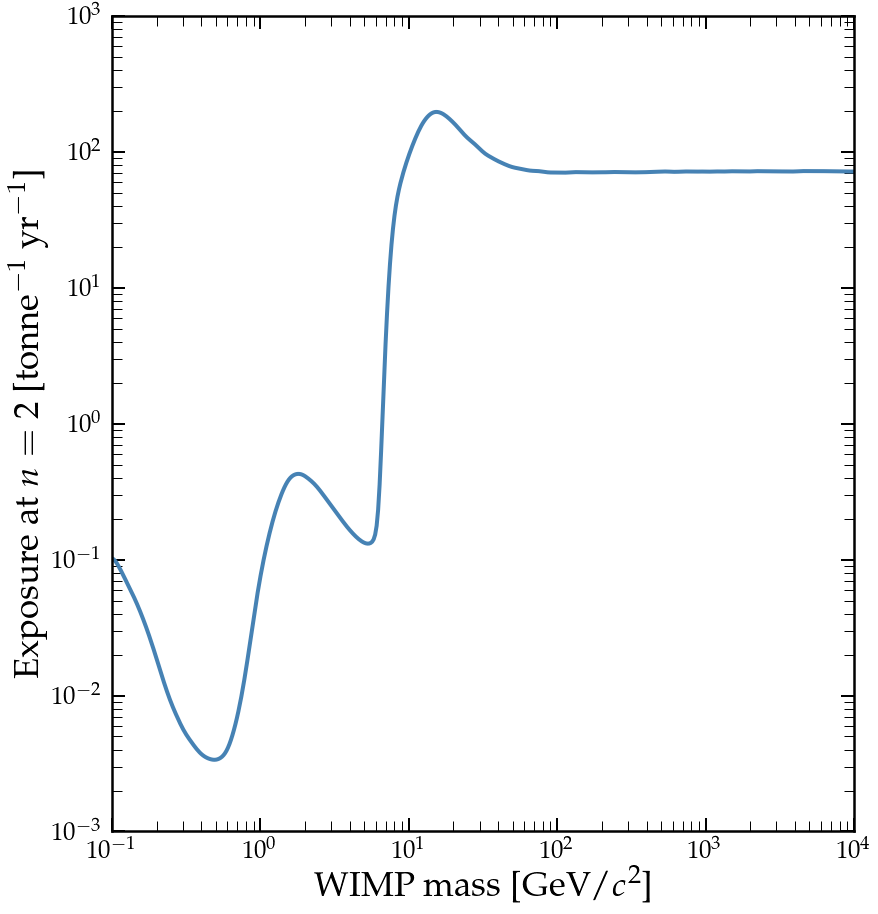

In [15]:

floor_expos = zeros(len(m))

for i,mass in enumerate(m):
    E = Ex[:,i]
    y = gaussian_filter1d(gaussian_filter1d(log10(E),sigma=3),3)
    dy = -gradient(y,log10(sig[2])-log10(sig[1]))
    dy = gaussian_filter1d(dy,3)
    Efloor = E[dy>2][-1]
    floor_expos[i] = Efloor

# smooth:
floor_expos = gaussian_filter1d(floor_expos,3)

fig = plt.figure(figsize=(13.3,15))
ax = fig.gca()

plt.plot(m,floor_expos,lw=4,color='steelblue')

ax.set_xlabel(r"WIMP mass [GeV$/c^2$]",fontsize=lfs)
ax.set_ylabel(r"Exposure at $n=2$ [tonne$^{-1}$ yr$^{-1}$]",fontsize=lfs)

# Plot Range
xmin = 1e-1
xmax = 1e4
ymin = 1e-3
ymax = 1e3

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_yscale('log')
ax.set_xscale('log')

# Ticks
ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10)
ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
#ax1.set_yticks(10.0**arange(-50,-39,1))

savetxt('../data/exposure_at_floor_Xe.txt',column_stack((m,floor_expos)))


<ipython-input-5-f0ccdd9181f3>:18: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
<ipython-input-5-f0ccdd9181f3>:185: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax1.pcolormesh(-m,sig,DY,vmin=vmin,vmax=vmax,cmap=cmap,rasterized=True)


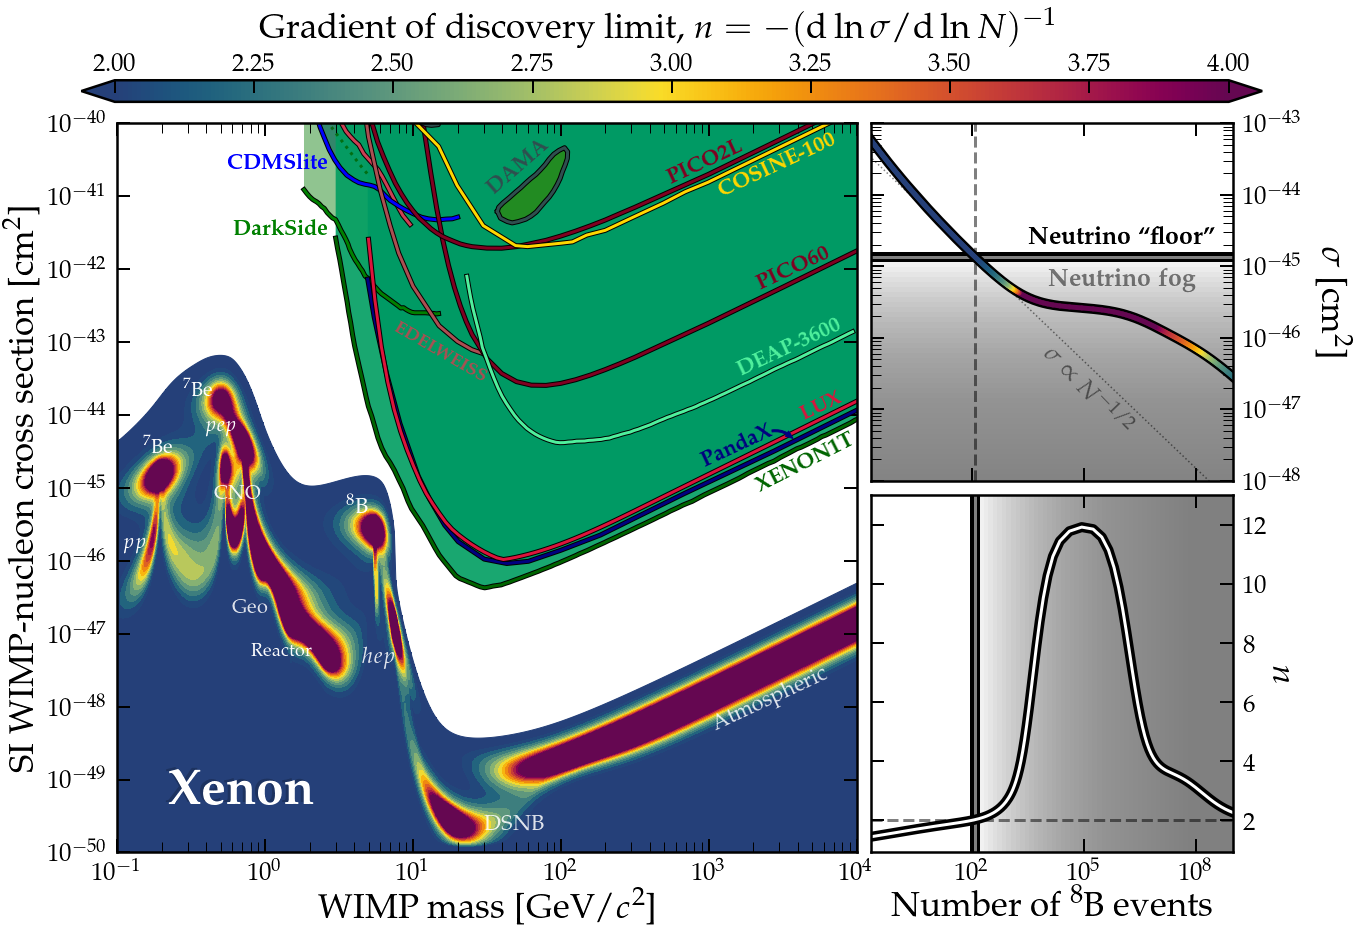

In [5]:
R = sum(BinnedNeutrinoRates(1.0e-4,200.0,50,Xe131,NuFlux)[5])

pek = line_background(10,'k')
#cmap = cmr.pride  
nmax = 13
vmax = 4
vmin = 2
m_example = 5.5

# Figure setup
import matplotlib.gridspec as gridspec
lw = 2.5
lfs = 35
tfs = 25
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.04)
gs.update(hspace=0.04)
ax1 = plt.subplot(gs[:,0:2])
ax2 = plt.subplot(gs[0,-1])
ax3 = plt.subplot(gs[1,-1])

# Plot limits
SILimits(ax1,Annotations=False)


# Plot neutrino fog
col_min = cmap(0.0)
cnt = ax1.contourf(m,sig,DY,levels=linspace(2,15,100),vmin=2.3,vmax=vmax,cmap=cmap,zorder=-100)
for c in cnt.collections: c.set_edgecolor("face")
#ax1.plot(m,NUFLOOR,'-',color='gray',lw=3,path_effects=pek,zorder=1)
ax1.fill_between(m,NUFLOOR,y2=1e-99,color=col_min,zorder=-1000)


# Plot single mass example line
x1 = m_example
x2 = m_example
y1 = 1e-44
y2 = 6e-47

# Calculate derivative of discovery limit
i = argmin(abs(m-m_example))
E = Ex[:,i]*R
y = gaussian_filter1d(gaussian_filter1d(log10(E),sigma=3),3)
dy = -gradient(y,log10(sig[2])-log10(sig[1]))
dy = gaussian_filter1d(dy,3) 

#ax1.plot([x1,x1],[y1,y2],'w-',lw=3,path_effects=pek)
#ax1.plot(x1,y1,'wo',markersize=30,mfc='w',mec='k',mew=3)
#ax1.plot(x2,y2,'wo',markersize=30,mfc='w',mec='k',mew=3)
#ax1.plot(x2,y2,'wo',markersize=30,mfc='w',mec='k',mew=3)

# Plot white circles (ax2)
#ax2.plot(interp(y1,sig,E),y1,'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
#ax2.plot(interp(y2,sig,E),y2,'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
#ax3.plot(interp(y1,sig,E),interp(y1,sig,dy),'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
#ax3.plot(interp(y2,sig,E),interp(y2,sig,dy),'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)

# Poisson line
sigfloor = sig[dy>2][-1]
E1 = interp(sigfloor,sig,E)
sig_poiss = sigfloor*sqrt(E1)/sqrt(E)
ax2.plot(E,sig_poiss,'k:',zorder=1,alpha=0.5)
ax2.text(6e3,0.45e-47,r'$\sigma \propto N^{-1/2}$',color='k',alpha=0.5,rotation=-46)

# Plot horizontal/vertical lines
Efloor = E[dy>2][-1]
ax2.axhline(sigfloor,color='gray',lw=3,path_effects=pek)
ax2.axvline(Efloor,lw=3,color='k',linestyle='--',alpha=0.5)
ax3.axvline(Efloor,lw=3,color='gray',path_effects=pek)
ax3.axhline(2,color='k',linestyle='--',lw=3,alpha=0.5)


# Plot coloured lines
ax2.loglog(E,sig,lw=3,color='w',path_effects=pek)
ax3.semilogx(E,dy,lw=3,color='w',path_effects=pek)
cval = (((dy - vmin)) / (vmax-vmin))
cval[isnan(cval)] = 0
cval[cval<0] = 0
cval[cval>1] = 1
for i in range(0,size(dy)-1):
    ax2.loglog([E[i],E[i+1]],[sig[i],sig[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')
    ax3.semilogx([E[i],E[i+1]],[dy[i],dy[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')

    
# Neutrino fog
for i in logspace(-7,0,100):
    ax2.fill_between(E,ones((size(E)))*sigfloor*i,y2=1e-99,color='gray',alpha=0.05,lw=0)
for i in logspace(0,12,100):
    ax3.fill_between([Efloor*i,1e10],[15,15],y2=-15,color='gray',alpha=0.05,lw=0)

    
# Text inside white circles
#ax1.text(x1*(1+0.01),y1*(1-0.01),'a',fontsize=23,ha='center',va='center')
#ax1.text(x2,y2*(1-0.05),'b',fontsize=23,ha='center',va='center')
#ax2.text(interp(y1,sig,E)*(1+0.02),y1*(1-0.01),'a',fontsize=23,ha='center',va='center',zorder=10)
#ax2.text(interp(y2,sig,E),y2*(1-0.05),'b',fontsize=23,ha='center',va='center',zorder=10)
#ax3.text(interp(y1,sig,E)*(1+0.02),interp(y1,sig,dy)*(1-0.01),'a',fontsize=23,ha='center',va='center',zorder=10)
#ax3.text(interp(y2,sig,E),interp(y2,sig,dy)*(1-0.02),'b',fontsize=23,ha='center',va='center',zorder=10)



# Axis limits
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax1.set_xlim([1e-1,1e4])
ax1.set_ylim([1e-50,1e-40])
ax2.set_ylim([1e-48,1e-43])
ax2.set_xlim([2e-1,1e9])
ax3.set_xlim([2e-1,1e9])
ax3.set_ylim([0.9,nmax])
ax2.set_xticklabels([])


# Text labels
ax1.set_xlabel(r"WIMP mass [GeV$/c^2$]",fontsize=lfs)
ax1.set_ylabel(r"SI WIMP-nucleon cross section [cm$^2$]",fontsize=lfs)
ax2.set_ylabel(r'$\sigma$ [cm$^2$]',fontsize=lfs,rotation=-90,labelpad=45)
ax3.set_ylabel(r'$n$',fontsize=lfs,rotation=-90,labelpad=30)
ax3.set_xlabel(r'Number of $^8$B events',fontsize=lfs)
ax2.text(1e6,sigfloor*1.5,r'{\bf Neutrino ``floor"}',color='k',ha='center')
ax2.text(1e6,sigfloor/2.5,r'{\bf Neutrino fog}',color='k',alpha=0.5,ha='center')
plt.gcf().text(0.16*(1-0.01),0.17*(1+0.01),r'{\bf Xenon}',color='k',fontsize=50,alpha=0.2)
plt.gcf().text(0.16,0.17,r'{\bf Xenon}',color='w',fontsize=50)


# Limits labels
ax1.text(0.55,2.4e-41,r"{\bf CDMSlite}",color="blue",fontsize=22,rotation=0)
ax1.text(2.7,3e-42,r"{\bf DarkSide}",color="green",fontsize=22,rotation=0,ha='right')
ax1.text(850.0,2.e-45,r"{\bf PandaX}",color="navy",fontsize=22,rotation=25)
ax1.text(2000.0,0.9e-45,r"{\bf XENON1T}",color="darkgreen",fontsize=22,rotation=27)
ax1.text(7.0,2.9e-44,r"{\bf EDELWEISS}",color=[0.67, 0.31, 0.32],fontsize=18,rotation=-30)
ax1.text(2000.0,5.4e-43,r"{\bf PICO60}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=25)
ax1.text(500.0,1.5e-41,r"{\bf PICO2L}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=25)
ax1.text(30.0,1.1e-41,r"{\bf DAMA}",color='darkslategray',fontsize=22,rotation=41)
ax1.text(1100.0,1e-41,r"{\bf COSINE-100}",color="gold",fontsize=22,rotation=25)
ax1.text(1.5e3,3.5e-44,r'{\bf DEAP-3600}',color='#4ff09d',fontsize=22,rotation=25)
ax1.text(4000.0,8.7e-45,r"{\bf LUX}",color="crimson",fontsize=21,rotation=25.5)
CurvedArrow(2.6e3,3.8e3,0.6e-44,0.45e-44,alpha=1,color='navy',connectionstyle="arc3,rad=-0.3",\
            style = "Simple, tail_width=2, head_width=6, head_length=8")

# Neutrino labels
ax1.text(1e3,5e-49,'Atmospheric',color='w',alpha=0.85,fontsize=22,rotation=25)
ax1.text(30,2e-50,'DSNB',color='w',alpha=0.85,fontsize=22,rotation=0)

ax1.text(4.5,4e-48,r'$hep$',color='w',alpha=0.85,fontsize=22,rotation=0)

ax1.text(3.5,4.5e-46,r'$^8$B',color='w',alpha=0.99,fontsize=22,rotation=0)

ax1.text(0.8,5e-48,r'Reactor',color='w',alpha=0.99,fontsize=18,rotation=0)

ax1.text(0.6,2e-47,r'Geo',color='w',alpha=0.85,fontsize=20,rotation=0)

ax1.text(0.45,7e-46,r'CNO',color='w',alpha=0.9,fontsize=20,rotation=0)

ax1.text(0.39,6e-45,r'$pep$',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.28,1.8e-44,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.15,3e-45,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.11,1.5e-46,r'$pp$',color='w',alpha=0.99,fontsize=20,rotation=0)

# Ticks
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax3.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)
ax1.set_yticks(10.0**arange(-50,-39,1))

# Colorbar
im = ax1.pcolormesh(-m,sig,DY,vmin=vmin,vmax=vmax,cmap=cmap,rasterized=True)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 0.82, 0.82, 0.02])
fig.colorbar(im, cax=cbar_ax,orientation='horizontal',extend='both',extendfrac=0.03)
cbar_ax.xaxis.set_ticks_position('top')
plt.gcf().text(0.5,0.88,r'Gradient of discovery limit, $n = -({\rm d}\ln\sigma/{\rm d}\ln N)^{-1}$',fontsize=35,ha='center')
cbar_ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True)

# Save figure
#MySaveFig(fig,'NuFloorExplanation')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater


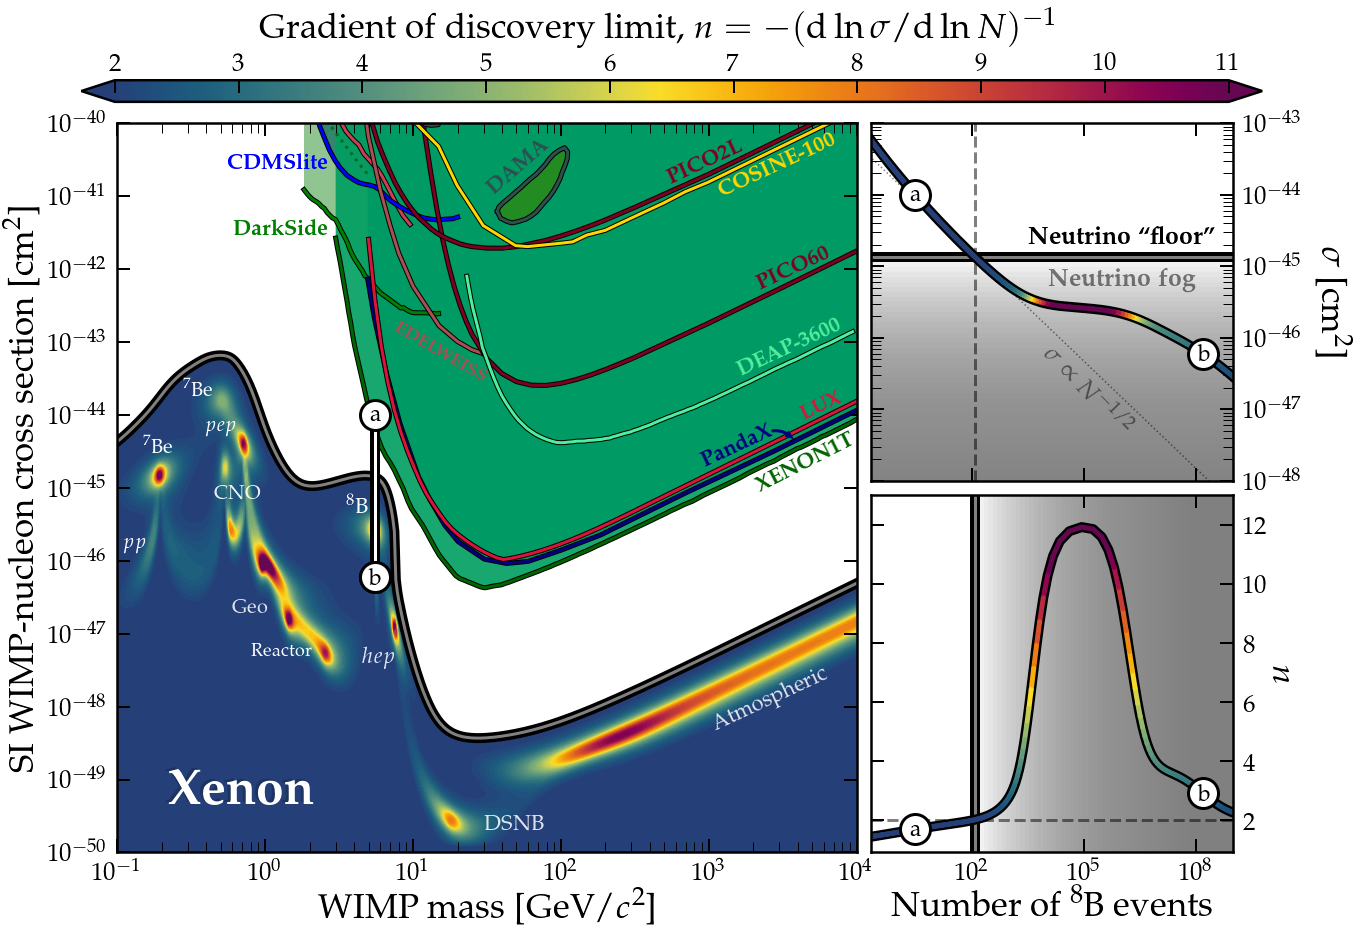

In [2]:
R = sum(BinnedNeutrinoRates(1.0e-4,200.0,50,Xe131,NuFlux)[5])

pek = line_background(10,'k')
#cmap = cmr.pride  
nmax = 13
vmax = 11
vmin = 2
m_example = 5.5

# Figure setup
import matplotlib.gridspec as gridspec
lw = 2.5
lfs = 35
tfs = 25
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.04)
gs.update(hspace=0.04)
ax1 = plt.subplot(gs[:,0:2])
ax2 = plt.subplot(gs[0,-1])
ax3 = plt.subplot(gs[1,-1])

# Plot limits
SILimits(ax1,Annotations=False)


# Plot neutrino fog
col_min = cmap(0.0)
cnt = ax1.contourf(m,sig,DY,levels=linspace(2,15,100),vmin=2.3,vmax=vmax,cmap=cmap,zorder=-100)
for c in cnt.collections: c.set_edgecolor("face")
ax1.plot(m,NUFLOOR,'-',color='gray',lw=3,path_effects=pek,zorder=1)
ax1.fill_between(m,NUFLOOR,y2=1e-99,color=col_min,zorder=-1000)


# Plot single mass example line
x1 = m_example
x2 = m_example
y1 = 1e-44
y2 = 6e-47

# Calculate derivative of discovery limit
i = argmin(abs(m-m_example))
E = Ex[:,i]*R
y = gaussian_filter1d(gaussian_filter1d(log10(E),sigma=3),3)
dy = -gradient(y,log10(sig[2])-log10(sig[1]))
dy = gaussian_filter1d(dy,3) 

ax1.plot([x1,x1],[y1,y2],'w-',lw=3,path_effects=pek)
ax1.plot(x1,y1,'wo',markersize=30,mfc='w',mec='k',mew=3)
ax1.plot(x2,y2,'wo',markersize=30,mfc='w',mec='k',mew=3)
ax1.plot(x2,y2,'wo',markersize=30,mfc='w',mec='k',mew=3)

# Plot white circles (ax2)
ax2.plot(interp(y1,sig,E),y1,'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
ax2.plot(interp(y2,sig,E),y2,'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
ax3.plot(interp(y1,sig,E),interp(y1,sig,dy),'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
ax3.plot(interp(y2,sig,E),interp(y2,sig,dy),'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)

# Poisson line
sigfloor = sig[dy>2][-1]
E1 = interp(sigfloor,sig,E)
sig_poiss = sigfloor*sqrt(E1)/sqrt(E)
ax2.plot(E,sig_poiss,'k:',zorder=1,alpha=0.5)
ax2.text(6e3,0.45e-47,r'$\sigma \propto N^{-1/2}$',color='k',alpha=0.5,rotation=-46)

# Plot horizontal/vertical lines
Efloor = E[dy>2][-1]
ax2.axhline(sigfloor,color='gray',lw=3,path_effects=pek)
ax2.axvline(Efloor,lw=3,color='k',linestyle='--',alpha=0.5)
ax3.axvline(Efloor,lw=3,color='gray',path_effects=pek)
ax3.axhline(2,color='k',linestyle='--',lw=3,alpha=0.5)


# Plot coloured lines
ax2.loglog(E,sig,lw=3,color='w',path_effects=pek)
ax3.semilogx(E,dy,lw=3,color='w',path_effects=pek)
cval = (((dy - vmin)) / (vmax-vmin))
cval[isnan(cval)] = 0
cval[cval<0] = 0
cval[cval>1] = 1
for i in range(0,size(dy)-1):
    ax2.loglog([E[i],E[i+1]],[sig[i],sig[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')
    ax3.semilogx([E[i],E[i+1]],[dy[i],dy[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')

    
# Neutrino fog
for i in logspace(-7,0,100):
    ax2.fill_between(E,ones((size(E)))*sigfloor*i,y2=1e-99,color='gray',alpha=0.05,lw=0)
for i in logspace(0,12,100):
    ax3.fill_between([Efloor*i,1e10],[15,15],y2=-15,color='gray',alpha=0.05,lw=0)

    
# Text inside white circles
ax1.text(x1*(1+0.01),y1*(1-0.01),'a',fontsize=23,ha='center',va='center')
ax1.text(x2,y2*(1-0.05),'b',fontsize=23,ha='center',va='center')
ax2.text(interp(y1,sig,E)*(1+0.02),y1*(1-0.01),'a',fontsize=23,ha='center',va='center',zorder=10)
ax2.text(interp(y2,sig,E),y2*(1-0.05),'b',fontsize=23,ha='center',va='center',zorder=10)
ax3.text(interp(y1,sig,E)*(1+0.02),interp(y1,sig,dy)*(1-0.01),'a',fontsize=23,ha='center',va='center',zorder=10)
ax3.text(interp(y2,sig,E),interp(y2,sig,dy)*(1-0.02),'b',fontsize=23,ha='center',va='center',zorder=10)



# Axis limits
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax1.set_xlim([1e-1,1e4])
ax1.set_ylim([1e-50,1e-40])
ax2.set_ylim([1e-48,1e-43])
ax2.set_xlim([2e-1,1e9])
ax3.set_xlim([2e-1,1e9])
ax3.set_ylim([0.9,nmax])
ax2.set_xticklabels([])


# Text labels
ax1.set_xlabel(r"WIMP mass [GeV$/c^2$]",fontsize=lfs)
ax1.set_ylabel(r"SI WIMP-nucleon cross section [cm$^2$]",fontsize=lfs)
ax2.set_ylabel(r'$\sigma$ [cm$^2$]',fontsize=lfs,rotation=-90,labelpad=45)
ax3.set_ylabel(r'$n$',fontsize=lfs,rotation=-90,labelpad=30)
ax3.set_xlabel(r'Number of $^8$B events',fontsize=lfs)
ax2.text(1e6,sigfloor*1.5,r'{\bf Neutrino ``floor"}',color='k',ha='center')
ax2.text(1e6,sigfloor/2.5,r'{\bf Neutrino fog}',color='k',alpha=0.5,ha='center')
plt.gcf().text(0.16*(1-0.01),0.17*(1+0.01),r'{\bf Xenon}',color='k',fontsize=50,alpha=0.2)
plt.gcf().text(0.16,0.17,r'{\bf Xenon}',color='w',fontsize=50)


# Limits labels
ax1.text(0.55,2.4e-41,r"{\bf CDMSlite}",color="blue",fontsize=22,rotation=0)
ax1.text(2.7,3e-42,r"{\bf DarkSide}",color="green",fontsize=22,rotation=0,ha='right')
ax1.text(850.0,2.e-45,r"{\bf PandaX}",color="navy",fontsize=22,rotation=25)
ax1.text(2000.0,0.9e-45,r"{\bf XENON1T}",color="darkgreen",fontsize=22,rotation=27)
ax1.text(7.0,2.9e-44,r"{\bf EDELWEISS}",color=[0.67, 0.31, 0.32],fontsize=18,rotation=-30)
ax1.text(2000.0,5.4e-43,r"{\bf PICO60}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=25)
ax1.text(500.0,1.5e-41,r"{\bf PICO2L}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=25)
ax1.text(30.0,1.1e-41,r"{\bf DAMA}",color='darkslategray',fontsize=22,rotation=41)
ax1.text(1100.0,1e-41,r"{\bf COSINE-100}",color="gold",fontsize=22,rotation=25)
ax1.text(1.5e3,3.5e-44,r'{\bf DEAP-3600}',color='#4ff09d',fontsize=22,rotation=25)
ax1.text(4000.0,8.7e-45,r"{\bf LUX}",color="crimson",fontsize=21,rotation=25.5)
CurvedArrow(2.6e3,3.8e3,0.6e-44,0.45e-44,alpha=1,color='navy',connectionstyle="arc3,rad=-0.3",\
            style = "Simple, tail_width=2, head_width=6, head_length=8")

# Neutrino labels
ax1.text(1e3,5e-49,'Atmospheric',color='w',alpha=0.85,fontsize=22,rotation=25)
ax1.text(30,2e-50,'DSNB',color='w',alpha=0.85,fontsize=22,rotation=0)

ax1.text(4.5,4e-48,r'$hep$',color='w',alpha=0.85,fontsize=22,rotation=0)

ax1.text(3.5,4.5e-46,r'$^8$B',color='w',alpha=0.99,fontsize=22,rotation=0)

ax1.text(0.8,5e-48,r'Reactor',color='w',alpha=0.99,fontsize=18,rotation=0)

ax1.text(0.6,2e-47,r'Geo',color='w',alpha=0.85,fontsize=20,rotation=0)

ax1.text(0.45,7e-46,r'CNO',color='w',alpha=0.9,fontsize=20,rotation=0)

ax1.text(0.39,6e-45,r'$pep$',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.28,1.8e-44,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.15,3e-45,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.11,1.5e-46,r'$pp$',color='w',alpha=0.99,fontsize=20,rotation=0)

# Ticks
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax3.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)
ax1.set_yticks(10.0**arange(-50,-39,1))

# Colorbar
im = ax1.pcolormesh(-m,sig,DY,vmin=vmin,vmax=vmax,cmap=cmap,rasterized=True)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 0.82, 0.82, 0.02])
fig.colorbar(im, cax=cbar_ax,orientation='horizontal',extend='both',extendfrac=0.03)
cbar_ax.xaxis.set_ticks_position('top')
plt.gcf().text(0.5,0.88,r'Gradient of discovery limit, $n = -({\rm d}\ln\sigma/{\rm d}\ln N)^{-1}$',fontsize=35,ha='center')
cbar_ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True)

# Save figure
#MySaveFig(fig,'NuFloorExplanation')

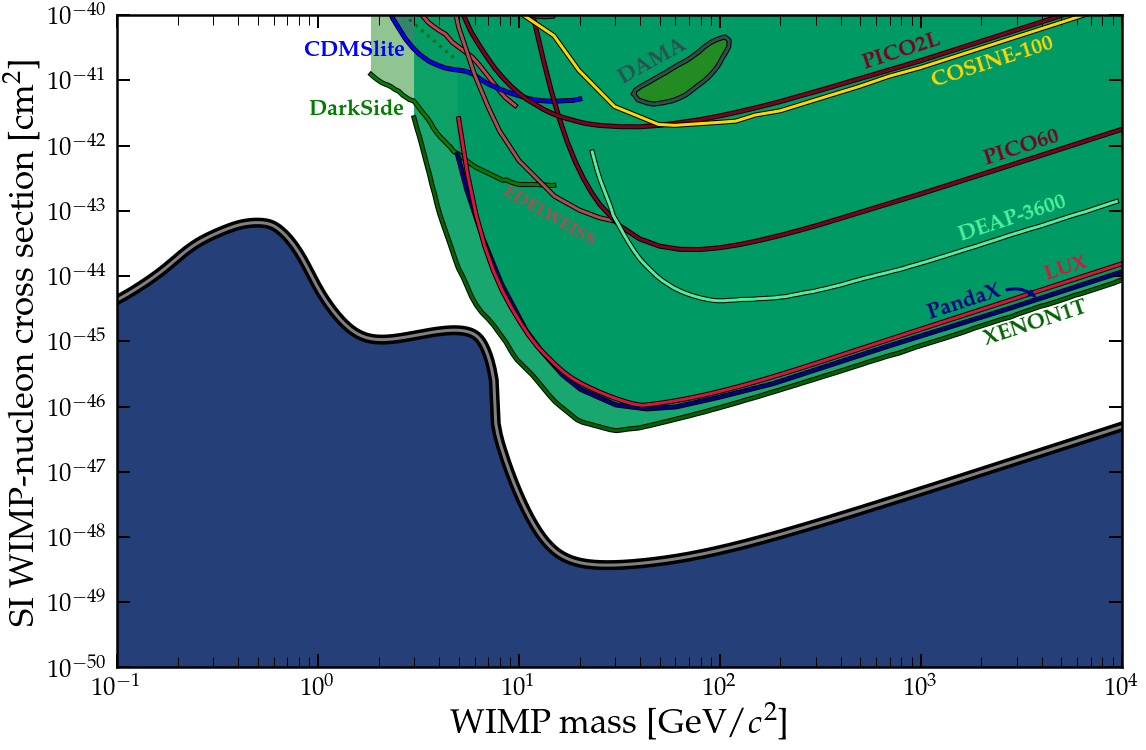

In [4]:
fig,ax1 = MySquarePlot(size_x=18)


# Plot limits
SILimits(ax1,Annotations=False)


# Plot neutrino fog
col_min = cmap(0.0)
#cnt = ax1.contourf(m,sig,DY,levels=linspace(2,15,100),vmin=2.3,vmax=vmax,cmap=cmap,zorder=-100)
#for c in cnt.collections: c.set_edgecolor("face")
ax1.plot(m,NUFLOOR,'-',color='gray',lw=3,path_effects=pek,zorder=1)
ax1.fill_between(m,NUFLOOR,y2=1e-99,color=col_min,zorder=-1000)

# Axis limits
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim([1e-1,1e4])
ax1.set_ylim([1e-50,1e-40])



# Text labels
ax1.set_xlabel(r"WIMP mass [GeV$/c^2$]",fontsize=lfs)
ax1.set_ylabel(r"SI WIMP-nucleon cross section [cm$^2$]",fontsize=lfs)
ax2.set_ylabel(r'$\sigma$ [cm$^2$]',fontsize=lfs,rotation=-90,labelpad=45)
ax3.set_ylabel(r'$n$',fontsize=lfs,rotation=-90,labelpad=30)
ax3.set_xlabel(r'Number of $^8$B events',fontsize=lfs)
ax2.text(1e6,sigfloor*1.5,r'{\bf Neutrino ``floor"}',color='k',ha='center')
ax2.text(1e6,sigfloor/2.5,r'{\bf Neutrino fog}',color='k',alpha=0.5,ha='center')
#plt.gcf().text(0.16*(1-0.01),0.17*(1+0.01),r'{\bf Xenon}',color='k',fontsize=50,alpha=0.2)
#plt.gcf().text(0.16,0.17,r'{\bf Xenon}',color='w',fontsize=50)


# Limits labels
ax1.text(0.85,2.4e-41,r"{\bf CDMSlite}",color="blue",fontsize=22,rotation=0)
ax1.text(2.7,3e-42,r"{\bf DarkSide}",color="green",fontsize=22,rotation=0,ha='right')
ax1.text(1050.0,2.2e-45,r"{\bf PandaX}",color="navy",fontsize=22,rotation=18)
ax1.text(2000.0,0.9e-45,r"{\bf XENON1T}",color="darkgreen",fontsize=22,rotation=18)
ax1.text(8.0,3.e-44,r"{\bf EDELWEISS}",color=[0.67, 0.31, 0.32],fontsize=18,rotation=-30)
ax1.text(2000.0,5.4e-43,r"{\bf PICO60}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=18)
ax1.text(500.0,1.5e-41,r"{\bf PICO2L}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=18)
ax1.text(30.0,0.9e-41,r"{\bf DAMA}",color='darkslategray',fontsize=22,rotation=29)
ax1.text(1100.0,0.8e-41,r"{\bf COSINE-100}",color="gold",fontsize=22,rotation=18)
ax1.text(1.5e3,3.5e-44,r'{\bf DEAP-3600}',color='#4ff09d',fontsize=22,rotation=18)
ax1.text(4000.0,8.7e-45,r"{\bf LUX}",color="crimson",fontsize=21,rotation=18)
CurvedArrow(2.6e3,3.8e3,0.6e-44,0.45e-44,alpha=1,color='navy',connectionstyle="arc3,rad=-0.3",\
            style = "Simple, tail_width=2, head_width=6, head_length=8")

# Neutrino labels
# ax1.text(1e3,5e-49,'Atmospheric',color='w',alpha=0.85,fontsize=22,rotation=18)
# ax1.text(30,2e-50,'DSNB',color='w',alpha=0.85,fontsize=22,rotation=0)

# ax1.text(4.8,7e-48,r'$hep$',color='w',alpha=0.85,fontsize=22,rotation=0)

# ax1.text(3.5,4.5e-46,r'$^8$B',color='w',alpha=0.99,fontsize=22,rotation=0)

# ax1.text(0.8,5e-48,r'Reactor',color='w',alpha=0.99,fontsize=18,rotation=0)

# ax1.text(0.6,2e-47,r'Geo',color='w',alpha=0.85,fontsize=20,rotation=0)

# ax1.text(0.45,7e-46,r'CNO',color='w',alpha=0.9,fontsize=20,rotation=0)

# ax1.text(0.39,6e-45,r'$pep$',color='w',alpha=0.99,fontsize=20,rotation=0)

# ax1.text(0.28,1.8e-44,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

# ax1.text(0.15,3e-45,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

# ax1.text(0.11,1.5e-46,r'$pp$',color='w',alpha=0.99,fontsize=20,rotation=0)

# Ticks
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.set_yticks(10.0**arange(-50,-39,1));

# Save figure
MySaveFig(fig,'NuFloor_Wide')

(array([[377.,  51.,   0., ...,   0.,   0.,   0.],
        [367.,  59.,   0., ...,   0.,   0.,   0.],
        [359.,  66.,   0., ...,   0.,   0.,   0.],
        ...,
        [339.,  30.,  12., ...,   0.,   0.,   0.],
        [338.,  31.,  10., ...,   0.,   0.,   0.],
        [338.,  31.,  11., ...,   0.,   0.,   0.]]),
 array([ 1.        ,  2.28414683,  3.56829365,  4.85244048,  6.1365873 ,
         7.42073413,  8.70488095,  9.98902778, 11.2731746 , 12.55732143,
        13.84146825]),
 <a list of 500 BarContainer objects>)

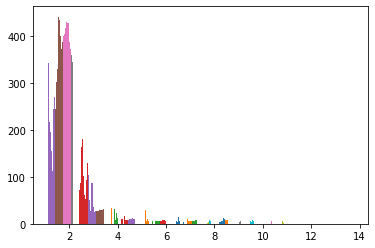

In [4]:
plt.hist(DY)

In [7]:
linspace(0,15,31)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ])

In [12]:
(4-0)/0.5

8.0

In [13]:
linspace(0,4,9)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [9]:
a = array([1,3,4,2,4])
a[:3] = 500
print(a)

[500 500 500   2   4]
